Сталь – один из важнейших строительных материалов современности. Стальные здания устойчивы к естественному и искусственному износу, что сделало этот материал повсеместно распространенным во всем мире. Чтобы сделать производство стали более эффективным, этот конкурс поможет выявить дефекты.


ссылка на каггл с этим соревнованием - https://www.kaggle.com/c/severstal-steel-defect-detection

### Постановка задачи :

Этот конкурс представляет собой двойной конкурс: классифицируйте тип дефекта стали, а также сегментируйте части изображения, содержащие дефект.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [5]:
data.shape

(7095, 3)

У нас 7095 и три фичи

# Разведочный анализ данных

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

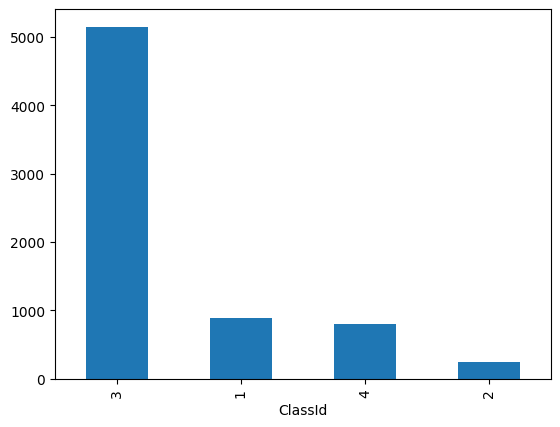

In [6]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

больше всего меток третьего класса

Перекос данных, поэтому выполним аугментацию.

In [9]:
import cv2

In [10]:
!unzip "train_images.zip" -d "train_images"

"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [14]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
    try:
      image=cv2.imread("train_images/{}".format(img),cv2.IMREAD_COLOR)
      image = cv2.resize(image,(120,120))
      l1.append(image)
      l2.append(ClassId)
    except:
      continue





100%|██████████| 7095/7095 [00:02<00:00, 3429.73it/s] 


In [15]:
l1[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 74,  74,  74],
        [ 60,  60,  60],
        [ 64,  64,  64]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 73,  73,  73],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 75,  75,  75],
        [ 65,  65,  65],
        [ 61,  61,  61]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [105, 105, 105]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [108, 108, 108]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [117, 117, 117],
        [109, 109, 109],
        [109, 109, 109]]

In [16]:
len(l1)

351

Проверка изображений случайной стали, чтобы проверить, дефектна ли она или нет.

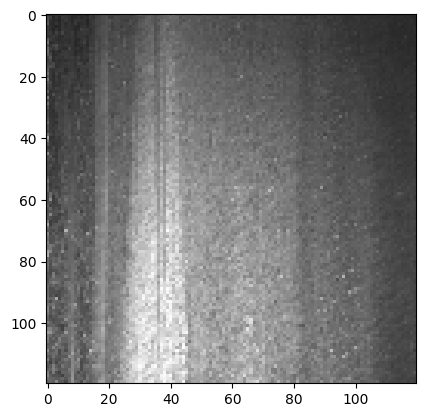

In [17]:
i = 15
plt.imshow(l1[i])

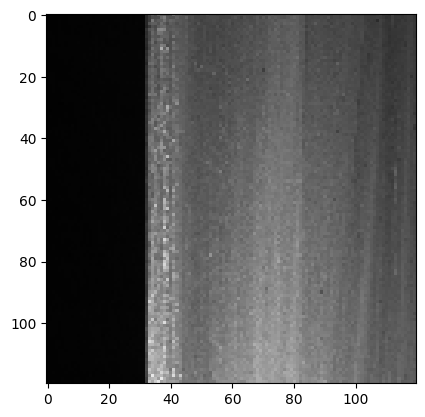

In [18]:
i = 16
plt.imshow(l1[i])

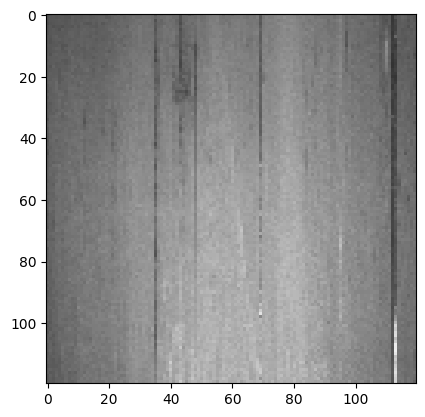

In [19]:
i = 90
plt.imshow(l1[i])

Выполним one-hot кодировку

In [20]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = np.array(y)


In [21]:
X.shape

(351, 120, 120, 3)

In [22]:
y.shape

(351,)

# Борьба с дибалансом

для борьбы с дисбалансом выполним случайное сэмплирование

In [24]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X , y)
X = X.reshape(-1,120,120,3)

In [25]:
X.shape

(984, 120, 120, 3)

In [26]:

y = to_categorical(y)

In [27]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

разделим на тренировку и валидацию

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [29]:
print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (787, 120, 120, 3)
x_test размер: (197, 120, 120, 3)
y_train размер: (787, 4)
y_test размер: (197, 4)


# Построение нейронной сети  в 3 слоя и график обучения

In [30]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [32]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 5s 503ms/step - loss: 8.3785 - accuracy: 0.3037 - val_loss: 5.3097 - val_accuracy: 0.3401
Epoch 2/10
7/7 [==============================] - 2s 310ms/step - loss: 3.0160 - accuracy: 0.3469 - val_loss: 2.0869 - val_accuracy: 0.4264
Epoch 3/10
7/7 [==============================] - 2s 323ms/step - loss: 1.3323 - accuracy: 0.5044 - val_loss: 1.0110 - val_accuracy: 0.4873
Epoch 4/10
7/7 [==============================] - 2s 308ms/step - loss: 0.8661 - accuracy: 0.6315 - val_loss: 0.8307 - val_accuracy: 0.5584
Epoch 5/10
7/7 [==============================] - 2s 347ms/step - loss: 0.7221 - accuracy: 0.8412 - val_loss: 0.7389 - val_accuracy: 0.7817
Epoch 6/10
7/7 [==============================] - 2s 310ms/step - loss: 0.5742 - accuracy: 0.8361 - val_loss: 0.5907 - val_accuracy: 0.8274
Epoch 7/10
7/7 [==============================] - 2s 320ms/step - loss: 0.4543 - accuracy: 0.8831 - val_loss: 0.5182 - val_accuracy: 0.8376
Epoch 8/10
7/7 [====

<Axes: title={'center': 'Loss curve'}>

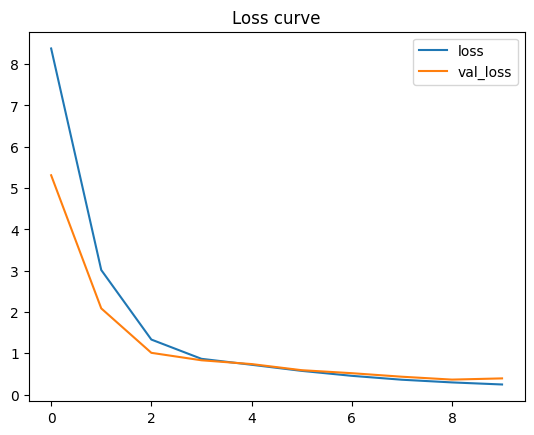

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

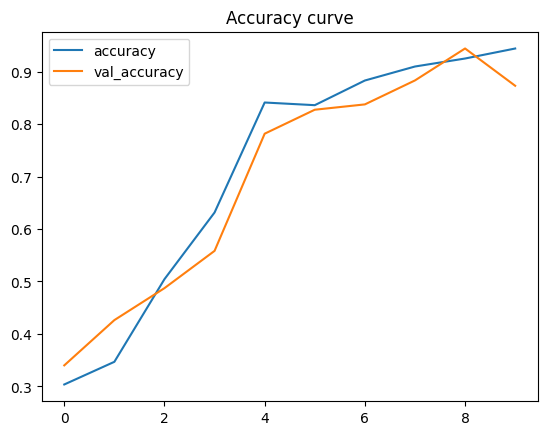

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

# Построение нейронной сети  в 5 слоев

In [35]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))


In [36]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [37]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 5s 642ms/step - loss: 9.1847 - accuracy: 0.2427 - val_loss: 2.7797 - val_accuracy: 0.3655
Epoch 2/10
7/7 [==============================] - 3s 451ms/step - loss: 3.4221 - accuracy: 0.3964 - val_loss: 3.3334 - val_accuracy: 0.3503
Epoch 3/10
7/7 [==============================] - 3s 433ms/step - loss: 2.3210 - accuracy: 0.4053 - val_loss: 1.4497 - val_accuracy: 0.4670
Epoch 4/10
7/7 [==============================] - 3s 422ms/step - loss: 1.1918 - accuracy: 0.5260 - val_loss: 1.0145 - val_accuracy: 0.5431
Epoch 5/10
7/7 [==============================] - 3s 418ms/step - loss: 0.9253 - accuracy: 0.6315 - val_loss: 0.8996 - val_accuracy: 0.5381
Epoch 6/10
7/7 [==============================] - 4s 522ms/step - loss: 0.8200 - accuracy: 0.6734 - val_loss: 0.8088 - val_accuracy: 0.7310
Epoch 7/10
7/7 [==============================] - 4s 554ms/step - loss: 0.7431 - accuracy: 0.7217 - val_loss: 0.7377 - val_accuracy: 0.7817
Epoch 8/10
7/7 [====

<Axes: title={'center': 'Loss curve'}>

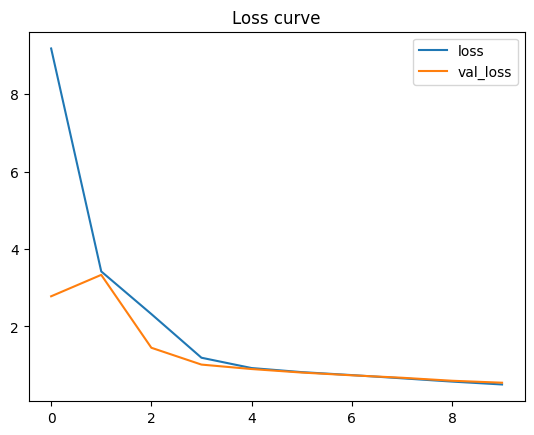

In [38]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

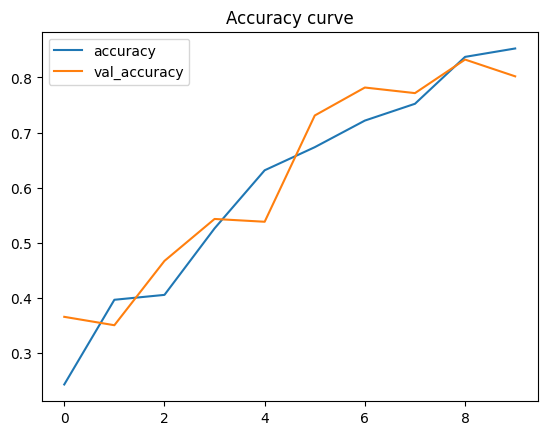

In [39]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [ ]:
варпвапвап

# Построение нейронной сети в 13 слоев и обучение

In [40]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

Сборка и обучение модели

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [42]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 5s 643ms/step - loss: 1.3682 - accuracy: 0.2808 - val_loss: 1.3537 - val_accuracy: 0.3401
Epoch 2/10
7/7 [==============================] - 4s 570ms/step - loss: 1.3380 - accuracy: 0.3698 - val_loss: 1.3260 - val_accuracy: 0.3959
Epoch 3/10
7/7 [==============================] - 4s 578ms/step - loss: 1.3154 - accuracy: 0.3825 - val_loss: 1.2634 - val_accuracy: 0.4264
Epoch 4/10
7/7 [==============================] - 4s 565ms/step - loss: 1.2350 - accuracy: 0.4625 - val_loss: 1.1492 - val_accuracy: 0.4721
Epoch 5/10
7/7 [==============================] - 4s 586ms/step - loss: 1.1464 - accuracy: 0.4511 - val_loss: 1.0399 - val_accuracy: 0.4721
Epoch 6/10
7/7 [==============================] - 5s 670ms/step - loss: 1.0735 - accuracy: 0.4625 - val_loss: 1.0437 - val_accuracy: 0.4721
Epoch 7/10
7/7 [==============================] - 5s 675ms/step - loss: 1.0225 - accuracy: 0.5172 - val_loss: 0.9767 - val_accuracy: 0.5178
Epoch 8/10
7/7 [====

# Анализ результатов обучения

<Axes: title={'center': 'Loss curve'}>

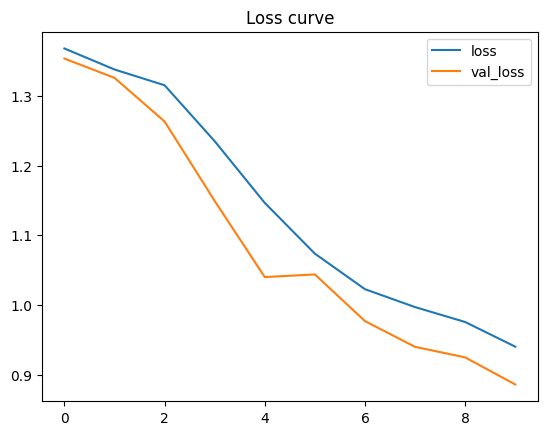

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

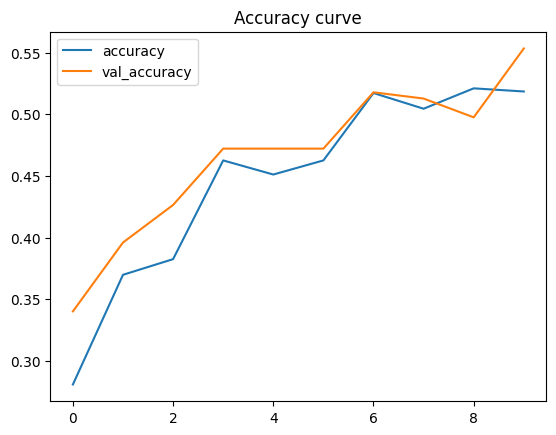

In [44]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [45]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 48ms/step - loss: 0.8857 - accuracy: 0.5533
[+] Accuracy: 55.33%


In [46]:
from keras.models import Model
model.save('my_model_steel.keras')

In [48]:
from keras.models import load_model

loaded_model = load_model('my_model_steel.keras')


# Архитектура созданной нейронной сети

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)        

# Тестирование на новых примерах

In [50]:
l2[:3]

[3, 3, 3]

In [51]:
X= np.array(l1[:3])
X = X/255

y = encoder.fit_transform(l2[:3])
y = np.array(y)

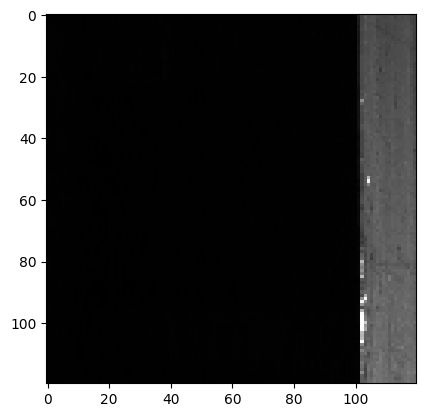

In [52]:
plt.imshow(l1[0]);

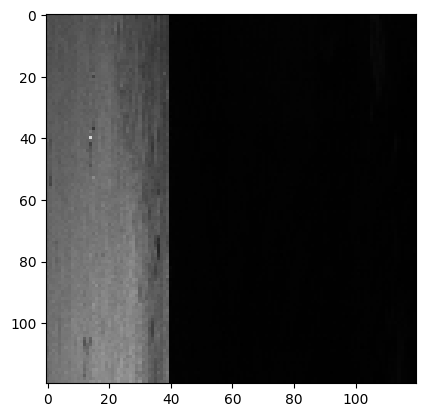

In [53]:
plt.imshow(l1[1]);

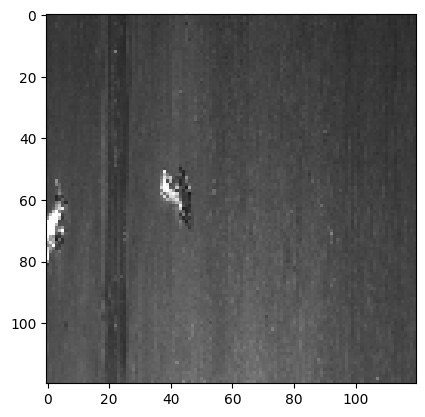

In [54]:
plt.imshow(l1[2]);

In [55]:
y =  to_categorical(y)
y

array([[1.],
       [1.],
       [1.]], dtype=float32)

In [56]:

predictions = model.predict(X)
predictions

1/1 [==============================] - 0s 124ms/step


array([[0.2923402 , 0.60366464, 0.06905432, 0.03494087],
       [0.05400313, 0.5533341 , 0.31943205, 0.07323077],
       [0.09949946, 0.2576753 , 0.43451467, 0.20831057]], dtype=float32)

Здесь три эксперимента, где мы видим, что тест № 2 был с меткой 3, но неверно идентифицировался как метка 1.

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)        

# описание архитектуры нейронной сети

У нас тут многослойная нейронная сеть с разными типами слоев.

теперь по поводу слоев нейронной сети и их особенностей.

1 слой - Conv2D. Он используется для выполнения двумерной свертки входных данных. Он применяет набор фильтров к входному изображению или карте объектов, перемещая их по входным данным и вычисляя скалярное произведение в каждом месте. Эта операция позволяет слою извлекать объекты и фиксировать пространственные отношения во входных данных. Уровень Conv2D обычно используется в сверточных нейронных сетях (CNN) для таких задач, как классификация изображений, обнаружение объектов и сегментация изображений.

2 слой - MaxPooling2D.  Это  операция понижающей дискретизации, которая уменьшает пространственные размеры (ширину и высоту) входного изображения или карты объектов. Он делит входные данные на непересекающиеся прямоугольники и выводит максимальное значение внутри каждого прямоугольника. Это помогает извлечь наиболее важные функции и снизить вычислительные требования для последующих слоев.

Далее эти слои повторяются еще 2 раза.

7 слой - Flatten. он преобразует входной тензор в одномерный массив, эффективно выравнивая его. Он принимает многомерный входной тензор, например двумерное изображение, и преобразует его в одномерный вектор, который можно использовать в качестве входных данных для полностью связного слоя или любого другого слоя, который ожидает одномерных входных данных.

8 слой - Dense. это полностью связный слой, который соединяет каждый нейрон предыдущего слоя с каждым нейроном текущего слоя. Он выполняет линейную операцию над входными данными, за которой следует функция активации, позволяющая сети изучать сложные закономерности и взаимосвязи в данных. Количество нейронов в плотном слое определяет размерность вывода.

9 cлой - Dropout. это метод регуляризации, используемый для уменьшения переобучения в нейронных сетях. Он случайным образом устанавливает для части входных единиц значение 0 на каждом этапе обучения, что помогает предотвратить слишком большую зависимость сети от конкретных функций или корреляций. Dropout улучшает способность модели к обобщению за счет внесения шума во время обучения и побуждает сеть изучать более надежные и независимые представления.

Далее слои повторяются.

В итоге в данной нейронной сети 12 различных слоев, и 139 780 параметров.

## DZ4

## Попытка №1

In [58]:
import imgaug.augmenters as iaa

# Аугментация данных

In [59]:
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Горизонтальное отражение с вероятностью 50%
    iaa.Affine(rotate=(-20, 20)),  # Вращение на случайный угол от -20 до 20 градусов
    iaa.GaussianBlur(sigma=(0, 1.0))  # Небольшое размытие
])


# Применение аугментации к данным

In [60]:
def augment_data(images):
    augmented_images = augmenter(images=images)
    return augmented_images

In [61]:
X_train_augmented = augment_data(X_train)

# Использование предварительно обученной модели

In [62]:
from keras.applications import ResNet50

In [64]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

94765736/94765736 [==============================] - 8s 0us/step


In [65]:
for layer in base_model.layers:
    layer.trainable = False

In [66]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Оптимизация гиперпараметров

In [67]:
optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Обучение модели

In [68]:
history = model.fit(X_train_augmented, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 1.4930 - accuracy: 0.2516 - val_loss: 1.3865 - val_accuracy: 0.2538
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 1.4038 - accuracy: 0.2732 - val_loss: 1.3842 - val_accuracy: 0.2538
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 1.3936 - accuracy: 0.2872 - val_loss: 1.3886 - val_accuracy: 0.2690
Epoch 4/20
7/7 [==============================] - 21s 3s/step - loss: 1.4126 - accuracy: 0.2351 - val_loss: 1.3842 - val_accuracy: 0.2640
Epoch 5/20
7/7 [==============================] - 21s 3s/step - loss: 1.3956 - accuracy: 0.2618 - val_loss: 1.3808 - val_accuracy: 0.2640
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 1.3826 - accuracy: 0.2910 - val_loss: 1.3811 - val_accuracy: 0.4010
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 1.3782 - accuracy: 0.2999 - val_loss: 1.3818 - val_accuracy: 0.3350
Epoch 8/20
7/7 [==================

# Анализ результатов обучения

<Axes: title={'center': 'Кривая точности'}>

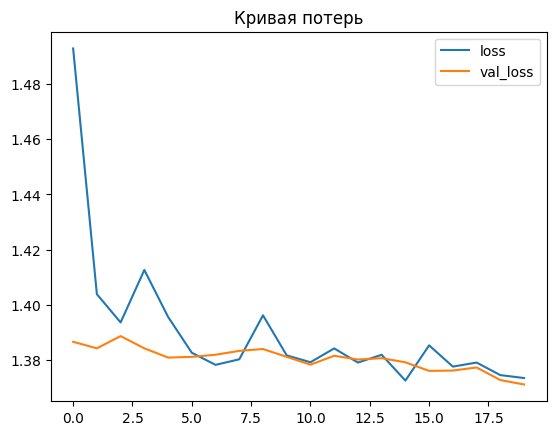

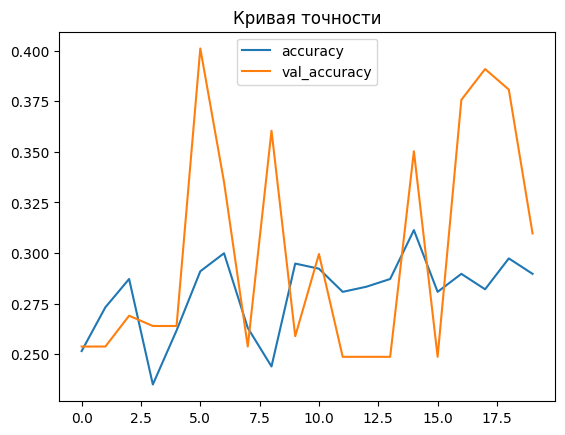

In [70]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Кривая потерь')
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Кривая точности')

# Оценка модели на тестовых данных

In [71]:
result = model.evaluate(X_test, y_test)

7/7 [==============================] - 4s 569ms/step - loss: 1.3711 - accuracy: 0.3096


In [72]:
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

[+] Accuracy: 30.96%


# Сохранение модели

In [73]:
model.save('improved_model_steel_4.keras')

## Вывод:
Внедрение аугментации данных, использование предварительно обученной модели ResNet50 для извлечения признаков из изображений, которая фиксирует веса базовой модели и добавляет несколько полносвязных слоев для классификации, также низкий learning rate и недостаточное увеличение количество эпох обучения привело к ухудшению результата предсказания.


## Попытка №2

In [75]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Изменение архитектуры модели

In [76]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(120,120,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Использование оптимизатора с адаптивным learning rate

In [77]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Уменьшение learning rate в случае стагнации метрики

In [78]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Обучение модели

In [79]:
history = model.fit(X_train_augmented, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64, callbacks=[reduce_lr])

Epoch 1/30
13/13 [==============================] - 18s 1s/step - loss: 1.5962 - accuracy: 0.3126 - val_loss: 1.2595 - val_accuracy: 0.4213 - lr: 0.0010
Epoch 2/30
13/13 [==============================] - 15s 1s/step - loss: 1.2645 - accuracy: 0.4003 - val_loss: 1.1998 - val_accuracy: 0.4010 - lr: 0.0010
Epoch 3/30
13/13 [==============================] - 17s 1s/step - loss: 1.2149 - accuracy: 0.4180 - val_loss: 1.1318 - val_accuracy: 0.4467 - lr: 0.0010
Epoch 4/30
13/13 [==============================] - 17s 1s/step - loss: 1.1302 - accuracy: 0.4981 - val_loss: 1.1771 - val_accuracy: 0.4365 - lr: 0.0010
Epoch 5/30
13/13 [==============================] - 17s 1s/step - loss: 1.1111 - accuracy: 0.4790 - val_loss: 1.0737 - val_accuracy: 0.4721 - lr: 0.0010
Epoch 6/30
13/13 [==============================] - 17s 1s/step - loss: 1.0524 - accuracy: 0.5095 - val_loss: 1.0173 - val_accuracy: 0.5178 - lr: 0.0010
Epoch 7/30
13/13 [==============================] - 17s 1s/step - loss: 0.9850 - a

# Анализ результатов обучения

<Axes: title={'center': 'Кривая точности'}>

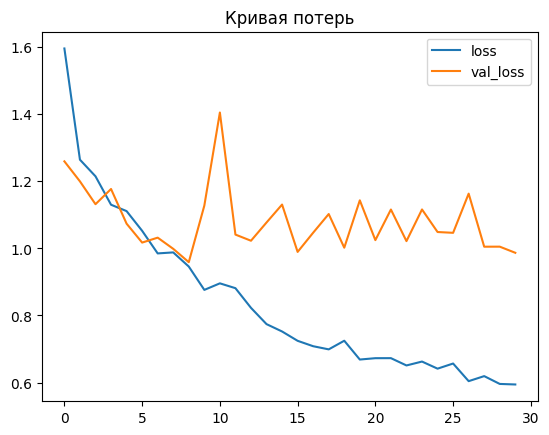

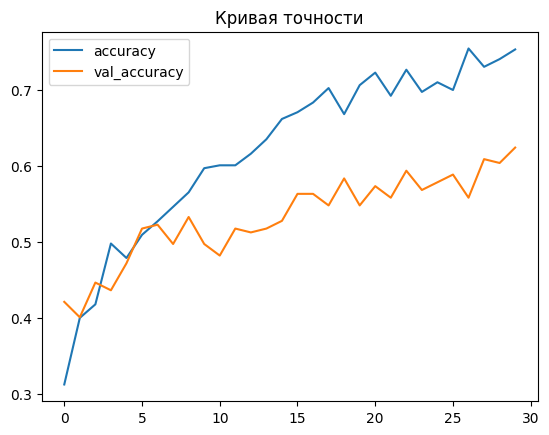

In [80]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Кривая потерь')
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Кривая точности')

# Оценка модели на тестовых данных

In [81]:
result = model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 153ms/step - loss: 0.9868 - accuracy: 0.6244


In [82]:
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

[+] Accuracy: 62.44%


# Сохранение модели

In [83]:
model.save('improved_model_steel_4.2.keras')

## Вывод: 
Добавление больше слоев в модель, увеличивание число эпох обучения, использование адаптивного learning rate и добавление слоя уменьшения learning rate в случае стагнации метрики помогли улучшить результат предсказания.